In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix as cm 

In [3]:
%matplotlib inline

In [4]:
import seaborn as sb
import numpy as np
import pandas as pd

In [5]:
import os
import re
import nltk

In [6]:
train  = pd.read_csv('C:/Users/Rohit Sanjay/Documents/Rohit/Texts/Third Year/Sem II/Funda of Data Science/FDS-Assignment/fake-news/train.csv')

In [7]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
test = pd.read_csv('C:/Users/Rohit Sanjay/Documents/Rohit/Texts/Third Year/Sem II/Funda of Data Science/FDS-Assignment/fake-news/test.csv')

In [9]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [10]:
#null and dirty values in train
print(train.isnull().sum())


id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [11]:
#null and dirty values in test
print(test.isnull().sum())

id          0
title     122
author    503
text        7
dtype: int64


In [12]:
#cleaning
test = test.fillna(' ')
train = train.fillna(' ')
test['total'] = test['title']+' '+test['author']+' '+test['text']
train['total'] = train['title']+' '+train['author']+' '+train['text']

In [13]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [14]:
test.head()

,id,title,author,text,total
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...","Specter of Trump Loosens Tongues, if Not Purse..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,#NoDAPL: Native American Leaders Vow to Stay A...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...","Tim Tebow Will Attempt Another Comeback, This ..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Keiser Report: Meme Wars (E995) Truth Broadcas...


In [15]:
# wordcloud
realwords = ''
fakewords = ''
stopword = set(STOPWORDS)
for val in train[train['label']==1].total:
    t = val.split()
    for i in range(len(t)):
        t[i] = t[i].lower()
    realwords += " ".join(t)+" "

for val in train[train['label']==0].total:
    t = val.split()
    for i in range(len(t)):
        t[i] = t[i].lower()
    fakewords += " ".join(t)+" "
        

In [16]:
#wordcloud for realwords
wordcloud = WordCloud(width = 1200, height=1200,
                        background_color = 'white',
                         stopwords = stopword,
                     min_font_size = 12).generate(realwords)

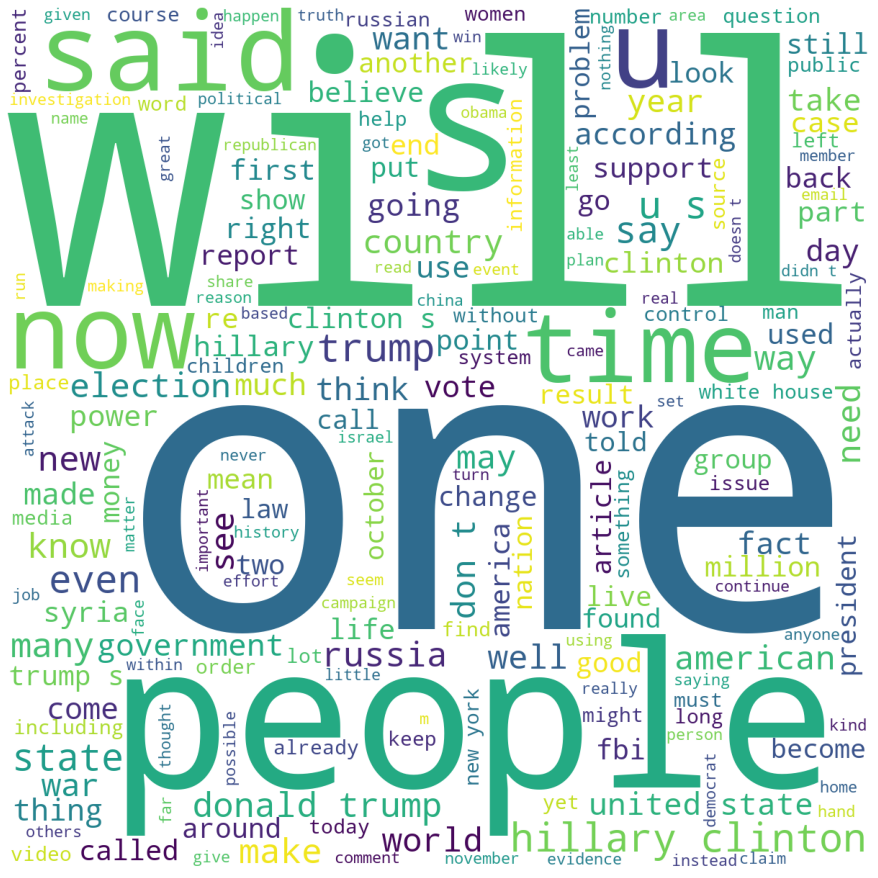

In [17]:
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 

In [18]:
#wordcloud for fakewords
wordcloud = WordCloud(width = 1200, height=1200,
                        background_color = 'white',
                         stopwords = stopword,
                     min_font_size = 12).generate(fakewords)

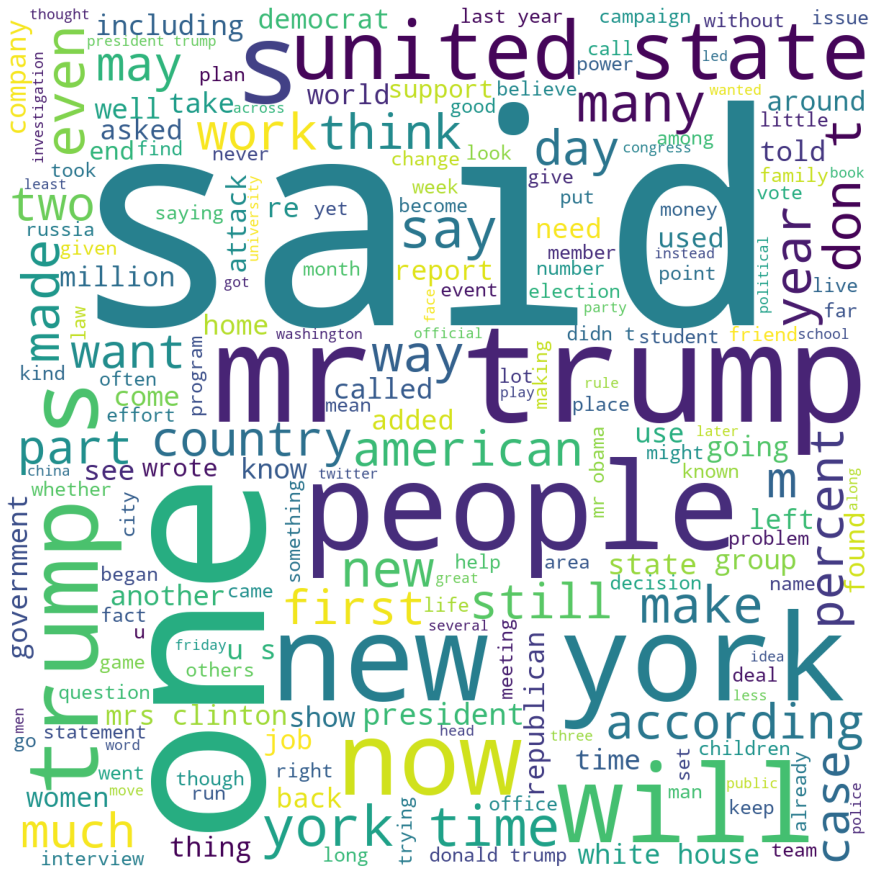

In [19]:
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)  
plt.show() 

In [20]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
from nltk import word_tokenize
nltk.download('punkt') 
nltk.download('wordnet')


[nltk_data] Downloading package punkt to C:\Users\ROHIT
[nltk_data]     SANJAY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to C:\Users\ROHIT
[nltk_data]     SANJAY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [21]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stopword]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence


In [22]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didnt even see comeys lette...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman campus breitb...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why truth might get you fired consortiumnewsc...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 civilians killed in single us airstrike ha...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,iranian woman jailed fictional unpublished st...


In [23]:
train = train[['total','label']]

In [24]:
#include nlp packages 
from sklearn.feature_extraction.text import TfidfTransformer as TTF
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer as TV

In [25]:
Xtrain=train['total']
Ytrain=train['label']

In [26]:
#Feature Extracton
C_V = CV()
C_V.fit_transform(Xtrain)
FreqTerms=C_V.transform(Xtrain)
tfidf = TTF()
tfidf.fit(FreqTerms)
tfidfMatrix=tfidf.fit_transform(FreqTerms)

In [27]:
print(tfidfMatrix)
print('**********************************')
tfidfMatrix

  (0, 183604)	0.01409421211653178
  (0, 183195)	0.04766871022942517
  (0, 183078)	0.009450507482416458
  (0, 181780)	0.0429142019017847
  (0, 181768)	0.06918605901667198
  (0, 181623)	0.03657927569738516
  (0, 181539)	0.012870988718324582
  (0, 180957)	0.01585830272815046
  (0, 180756)	0.0583190386206121
  (0, 180456)	0.008872726369680683
  (0, 179658)	0.014711166834848282
  (0, 179575)	0.020457714181773563
  (0, 179344)	0.016587590140771952
  (0, 179101)	0.012102882530988778
  (0, 178972)	0.03268414193156667
  (0, 178850)	0.0583190386206121
  (0, 178628)	0.023137903452102485
  (0, 178530)	0.01145480025943337
  (0, 177202)	0.027668876581146803
  (0, 177169)	0.020935493817280805
  (0, 177097)	0.016455432165137444
  (0, 175694)	0.020903684486282034
  (0, 173826)	0.06389598051975608
  (0, 172929)	0.056063509044886786
  (0, 172612)	0.0336403779758291
  :	:
  (20799, 10861)	0.02045885006713438
  (20799, 10857)	0.025905222467958653
  (20799, 10771)	0.030451953889703523
  (20799, 10681)	0.038

<20800x210581 sparse matrix of type '<class 'numpy.float64'>'
	with 5951727 stored elements in Compressed Sparse Row format>

In [28]:
tfidfMatrix.toarray().shape

(20800, 210581)

In [29]:
#Confusion Matrix
def Confusion_Matrix(cm, classes, normalize=False, 
                     title = 'Confusion Matrix',
                    cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arrange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm= cm.astype('float') / cm.sum(axis=1)[: ,np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matix(Not Normalized')
    thresh=cm.max() /2.
    for i, j in iter.product(range(cm.shape[0]), range[cm.shape[1]]):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                    color='black' if cm[i,j] > thresh else "red")
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


In [30]:
#model Making
test_counts=C_V.transform(test['total'].values)
test_tfidf = tfidf.transform(test_counts)
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,ytrain,ytest = tts(tfidfMatrix, Ytrain, random_state=0)

In [31]:
#logistic Regression
from sklearn.linear_model import LogisticRegression as LR
log = LR(C=1e5)
log.fit(Xtrain, ytrain)
pred=log.predict(Xtest)


C:\Users\ROHIT SANJAY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#Printing
print('Accuracy of classifer on training set: {:.2f}'
      .format(log.score(Xtrain, ytrain)))
print('Accuracy of classifier on test set: {:.2f}'.format(
        log.score(Xtest, ytest)))



Accuracy of classifer on training set: 1.00
Accuracy of classifier on test set: 0.98


<AxesSubplot:>

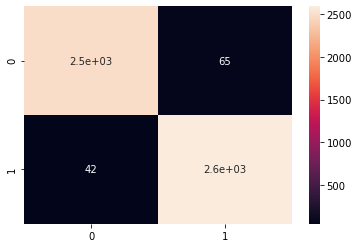

In [33]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(ytest, pred)
import seaborn as sns
sns.heatmap(cm1, annot=True)

Accuracy of NB classifier on training 0.89
Accuracy of NB classifier with test data 0.85


<AxesSubplot:>

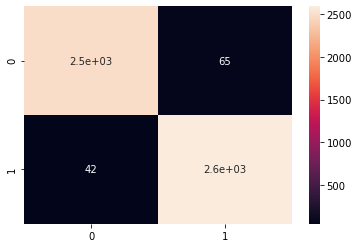

In [34]:
#MultinomialNB
from sklearn.naive_bayes import MultinomialNB 
MNB = MultinomialNB()
MNB.fit(Xtrain, ytrain)
print('Accuracy of NB classifier on training {:.2f}'
      .format(MNB.score(Xtrain,ytrain)))
print('Accuracy of NB classifier with test data {:.2f}'
     .format(MNB.score(Xtest,ytest)))
cm2=confusion_matrix(ytest, pred)
import seaborn as sns
sns.heatmap(cm2, annot=True)

In [35]:
#enabling a pipline
from sklearn.pipeline import Pipeline as PP
#from sklearn.externals import joblib
from sklearn import linear_model as lm
from sklearn.feature_extraction.text import TfidfTransformer as TFIDF
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer as TV
Xtrain = train['total']
Ytrain = train['label']
pipeline = PP([
    ('vect', CV()),
    ('tfidf',TFIDF(norm='l2')),
    ('clf',LR(C=1e5))
    
])
pipeline.fit(Xtrain, Ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0))])

In [36]:
#test prediction
pipeline.predict(["""
                  House Dem Aide: We Didnâ€™t Even See Comeyâ€™s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) 
With apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this weekâ€“FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clintonâ€™s email server, the ranking Democrats on the relevant committees didnâ€™t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. 
As we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emails it had recently discovered in order to see if they contained classified information. Not long after this letter went out, Oversight Committee Chairman Jason Chaffetz set the political world ablaze with this tweet. FBI Dir just informed me, ""The FBI has learned of the existence of emails that appear to be pertinent to the investigation."" Case reopened 
â€” Jason Chaffetz (@jasoninthehouse) October 28, 2016 
Of course, we now know that this was not the case . Comey was actually saying that it was reviewing the emails in light of â€œan unrelated caseâ€â€“which we now know to be Anthony Weinerâ€™s sexting with a teenager. But apparently such little things as facts didnâ€™t matter to Chaffetz. The Utah Republican had already vowed to initiate a raft of investigations if Hillary winsâ€“at least two yearsâ€™ worth, and possibly an entire termâ€™s worth of them. Apparently Chaffetz thought the FBI was already doing his work for himâ€“resulting in a tweet that briefly roiled the nation before cooler heads realized it was a dud. 
But according to a senior House Democratic aide, misreading that letter may have been the least of Chaffetzâ€™ sins. That aide told Shareblue that his boss and other Democrats didnâ€™t even know about Comeyâ€™s letter at the timeâ€“and only found out when they checked Twitter. â€œDemocratic Ranking Members on the relevant committees didnâ€™t receive Comeyâ€™s letter until after the Republican Chairmen. In fact, the Democratic Ranking Members didnâ€™ receive it until after the Chairman of the Oversight and Government Reform Committee, Jason Chaffetz, tweeted it out and made it public.â€ 
So letâ€™s see if weâ€™ve got this right. The FBI director tells Chaffetz and other GOP committee chairmen about a major development in a potentially politically explosive investigation, and neither Chaffetz nor his other colleagues had the courtesy to let their Democratic counterparts know about it. Instead, according to this aide, he made them find out about it on Twitter. 
There has already been talk on Daily Kos that Comey himself provided advance notice of this letter to Chaffetz and other Republicans, giving them time to turn on the spin machine. That may make for good theater, but there is nothing so far that even suggests this is the case. After all, there is nothing so far that suggests that Comey was anything other than grossly incompetent and tone-deaf. 
What it does suggest, however, is that Chaffetz is acting in a way that makes Dan Burton and Darrell Issa look like models of responsibility and bipartisanship. He didnâ€™t even have the decency to notify ranking member Elijah Cummings about something this explosive. If that doesnâ€™t trample on basic standards of fairness, I donâ€™t know what does. 
Granted, itâ€™s not likely that Chaffetz will have to answer for this. He sits in a ridiculously Republican district anchored in Provo and Orem; it has a Cook Partisan Voting Index of R+25, and gave Mitt Romney a punishing 78 percent of the vote in 2012. Moreover, the Republican House leadership has given its full support to Chaffetzâ€™ planned fishing expedition. But that doesnâ€™t mean we canâ€™t turn the hot lights on him. After all, he is a textbook example of what the House has become under Republican control. And he is also the Second Worst Person in the World. About Darrell Lucus 
Darrell is a 30-something graduate of the University of North Carolina who considers himself a journalist of the old school. An attempt to turn him into a member of the religious right in college only succeeded in turning him into the religious right's worst nightmare--a charismatic Christian who is an unapologetic liberal. His desire to stand up for those who have been scared into silence only increased when he survived an abusive three-year marriage. You may know him on Daily Kos as Christian Dem in NC . Follow him on Twitter @DarrellLucus or connect with him on Facebook . Click here to buy Darrell a Mello Yello. Connect"

                  """])

array([1], dtype=int64)